<a href="https://colab.research.google.com/github/Kanchanasud/My-Performance/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

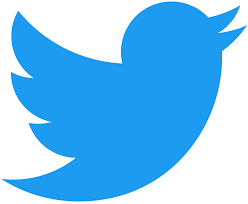

## Due Date: Sunday, September 25
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. a
2. b
3. c
4. d
5. e
6. f

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

In [ ]:
# Uncomment to install library if you have not done so
#!pip3 install wordcloud

In [ ]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Permit reading data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.

#### Read JSON file

In [ ]:
# Specify the corresponding directory in your drive
file = open('/content/drive/My Drive/Colab Notebooks/DW_BDA_Project1/thailand_tweets.txt','r')
foo = file.read() 
data = json.loads(foo)
file.close()

In [ ]:
# inspect the file
print(data)

{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider", "cr

In [ ]:
# Convert the data object into dict if it is not in dict format
# Note: json.loads takes a string as input and 
#        returns a dictionary as output, 
#        while json.dumps take a dictionary as input and 
#        returns a string as output.
data_json = data
print("The data object type is",type(data_json))
while not isinstance(data_json, dict):
    # convert the data object into dict
    data_json = json.loads(data_json)
    print("After converting, the data object type is",type(data_json))

The data object type is <class 'str'>
After converting, the data object type is <class 'dict'>


#### Pretty print json/dict object

In [ ]:
pprint.pprint(data_json)

{'1564761905410875392': {'content': 'Tinggal cari duitnya aja ini mah kalo di '
                                    'Thailand bisa pake Qris',
                         'hashtags': [],
                         'images': [],
                         'is_retweet': False,
                         'likes': 0,
                         'link': '',
                         'mentions': [],
                         'name': '',
                         'posted_time': '2022-08-30T23:48:04+00:00',
                         'profile_picture': 'https://twitter.com/moanfIeur/photo',
                         'replies': 0,
                         'retweets': 0,
                         'tweet_id': '1564761905410875392',
                         'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                         'username': 'moanfIeur',
                         'videos': []},
 '1564761944061382656': {'content': 'Padahal berharap pertama lawan Thailand '
                     

In fact, `pandas` has `pandas.read_json(<file_dir>) function to read json file into dataframe

In [ ]:
pd.read_json(StringIO(data), orient='index').head()

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


As we create a data dict, we can also read our data dict into a pandas dataframe

In [ ]:
pd.DataFrame.from_dict(data_json)

,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,1564763907700531202,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
tweet_id,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,1564763907700531202,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
username,matthunter,DavSmithVP,DailyPattaya,Bryan62766077,Megan_and_Grrr,OhmPawatInter,nato_tonyo11,ThThitikarn61,Livetradingnews,DiscoverSoc,...,LDN327,Jay_beebee,Iovelydoll,jaemmrchv,Zeepruk_jfc,NFTLadyEve,AntzAntz1,taraxacumyx,IrfanHazard10,moanfIeur
name,MATT HUNTΞR,DavSmith / Virtual Photography,The Pattaya Daily,Bryan,Megan,OhmPawat International,nutri(BUSY SI ENGR.)| SoliD,thiti,Knightly News,Discover Society,...,LDN327,Jay Bee,,wonyoungiii | surprise cutie,ZeePruk_JapanFC（Rest）,NFTeVe,palito..showcase,Dandelion,Irfan Rapiansyah,
profile_picture,https://twitter.com/matthunter/photo,https://twitter.com/DavSmithVP/photo,https://twitter.com/DailyPattaya/photo,https://twitter.com/Bryan62766077/photo,https://twitter.com/Megan_and_Grrr/photo,https://twitter.com/OhmPawatInter/photo,https://twitter.com/nato_tonyo11/photo,https://twitter.com/ThThitikarn61/photo,https://twitter.com/Livetradingnews/photo,https://twitter.com/DiscoverSoc/photo,...,https://twitter.com/LDN327/photo,https://twitter.com/Jay_beebee/photo,https://twitter.com/Iovelydoll/photo,https://twitter.com/jaemmrchv/photo,https://twitter.com/Zeepruk_jfc/photo,https://twitter.com/NFTLadyEve/photo,https://twitter.com/AntzAntz1/photo,https://twitter.com/taraxacumyx/photo,https://twitter.com/IrfanHazard10/photo,https://twitter.com/moanfIeur/photo
replies,2,0,0,1,0,0,0,0,0,0,...,1,1,0,0,2,1,0,1,0,0
retweets,1,0,0,0,0,99,2,0,2,1,...,7,7,0,1,54,0,0,0,0,0
likes,7,2,0,1,0,143,18,0,3,0,...,5,7,3,0,32,1,0,0,0,0
is_retweet,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
posted_time,2022-08-30T23:59:57+00:00,2022-08-30T23:59:50+00:00,2022-08-30T23:59:45+00:00,2022-08-30T23:59:13+00:00,2022-08-30T23:58:15+00:00,2022-08-30T23:58:10+00:00,2022-08-30T23:57:50+00:00,2022-08-30T23:57:29+00:00,2022-08-30T23:56:30+00:00,2022-08-30T23:56:02+00:00,...,2022-08-30T23:53:35+00:00,2022-08-30T23:53:09+00:00,2022-08-30T23:52:59+00:00,2022-08-30T23:52:37+00:00,2022-08-30T23:49:48+00:00,2022-08-30T23:49:47+00:00,2022-08-30T23:49:07+00:00,2022-08-30T23:48:33+00:00,2022-08-30T23:48:13+00:00,2022-08-30T23:48:04+00:00
content,"Thanks for asking! Yes, we will support shippi...",Tomb Raider Underworld | Thailand \n#VirtualPh...,The latest The Pattaya Daily! http://thepattay...,"You can live some places for next to nothing, ...","ALIEN HOUSE is a story of love, hope and alien...",Trend twitter update \n\nTop Twitter influence...,Good morning world! And goodmorning to you to...,Listening to #faraway the title track of #theo...,With the recent news of the SCB X-Bitkub deal ...,#ICYMI On the Frontline. Crude Power in Thail...,...,- please engage\n\nELLE Thailand \n https://i...,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",we need more ten vlogs in thailand...a girl ca...,@NaEMwi\n @jaemwinner\n @JAEMIN_THAILAND,Can you help me?\n\ntracking number\nFMP200001...,how about Friday at 11 am? that way it will b...,เป๊ก ปาล์มมี่ | Disney+ Hotstar Thailand https...,@blueeyellowww\n Yuk nabung buat ke Thailand wkwk,Padahal berharap pertama lawan Thailand atau F...,Tinggal cari duitnya aja ini mah kalo di Thail...


#### Retrive tweet contents from the datase

In [ ]:
# An example of how to concatenate all tweet contents by joining them with new lines
contents = "\n".join([data_json[key]['content'] for key in data_json.keys()])
print('Now you get a', type(contents), 'object that you can work on it :)')
print(contents)

Now you get a <class 'str'> object that you can work on it :)
Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics
The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya
You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2
ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan…
Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 

### Report
* The total number of tweets collected in the file: 
* The content of the first tweet: 
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data:
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# ----------------- Your code here -----------------

In [ ]:
tweet_th = pd.read_json(StringIO(data), orient='index') # อ่านไฟล์ json เก็บในตัวแปร tweet_th
tweet_th

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
2019-08-02 16:47:25.825458181,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
2019-08-02 16:46:01.742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
2019-08-02 16:44:34.098323456,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30 23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
2019-08-02 16:40:28.014313472,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30 23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
2019-08-02 16:38:27.700531202,1564763907700531200,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30 23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


- **The total number of tweets collected in the file:**

In [ ]:
data_json.keys() # json เป็นรูปแบบ data dict คือ เป็นเซตประกอบไปด้วย g.value ถูกแยกด้วย colon  # มีทั้งหมด 29 ทวีต ดูจาก keys

dict_keys(['1564764893038882816', '1564764866598080513', '1564764845685280772', '1564764710804897792', '1564764468277612549', '1564764445825458181', '1564764361742110720', '1564764274098323456', '1564764028014313472', '1564763907700531202', '1564763775403712513', '1564763746463105026', '1564763729967054848', '1564763679232405504', '1564763673662464003', '1564763553130655744', '1564763407818952705', '1564763389058027521', '1564763303989366784', '1564763292354355200', '1564763185244426240', '1564763141589897217', '1564763050477244417', '1564762341324992513', '1564762335192940544', '1564762170277052418', '1564762027507458049', '1564761944061382656', '1564761905410875392'])

In [ ]:
data_json['1564764893038882816'] # ดู keys แรก

{'tweet_id': '1564764893038882816',
 'username': 'matthunter',
 'name': 'MATT HUNTΞR',
 'profile_picture': 'https://twitter.com/matthunter/photo',
 'replies': 2,
 'retweets': 1,
 'likes': 7,
 'is_retweet': False,
 'posted_time': '2022-08-30T23:59:57+00:00',
 'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
 'hashtags': [],
 'mentions': [],
 'images': [],
 'videos': [],
 'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
 'link': ''}

* **The content of the first tweet:**

In [ ]:
data_json['1564764893038882816']['content']  # เนื้อหาของทวีตแรก

'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. '

- **Is the first tweet contained any hashtags or mentions?**

In [ ]:
data_json['1564764893038882816']['hashtags']  # ไม่มี hashtags

[]

In [ ]:
data_json['1564764893038882816']['mentions']  # ไม่มี mentions

[]

- **Collect all hashtags related to Thailand from this data:**

In [ ]:
tweet_th.columns  # เรียกดูชื่อ columns ทั้งหมดใน tweet_th

Index(['tweet_id', 'username', 'name', 'profile_picture', 'replies',
       'retweets', 'likes', 'is_retweet', 'posted_time', 'content', 'hashtags',
       'mentions', 'images', 'videos', 'tweet_url', 'link'],
      dtype='object')

In [ ]:
hashtags_tweet_th = tweet_th.drop(['tweet_id', 'username', 'name', 'profile_picture', 'replies',
       'retweets', 'likes', 'is_retweet', 'posted_time', 'content',
       'mentions', 'images', 'videos', 'tweet_url', 'link'], axis=1)  # drop columns ทั้งหมดใน tweet_th ให้เหลือแค่ columns hastags # axis=1 คือ แสดง 1 column
hashtags_tweet_th

,hashtags
2019-08-02 16:54:53.038882816,[]
2019-08-02 16:54:26.598080513,[VirtualPhotography]
2019-08-02 16:54:05.685280772,"[thailand, pattaya]"
2019-08-02 16:51:50.804897792,[]
2019-08-02 16:47:48.277612549,"[fantasy, extraterrestrial]"
2019-08-02 16:47:25.825458181,"[4, ohmpawat, ย]"
2019-08-02 16:46:01.742110720,[DonnyPangilinan]
2019-08-02 16:44:34.098323456,"[faraway, theotherside, MarkTuan]"
2019-08-02 16:40:28.014313472,[]
2019-08-02 16:38:27.700531202,[ICYMI]


- **Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts**

- **หาจำนวน Tweet ที่มีการ replies มากที่สุด**

In [ ]:
tweet_th['replies'].max()   # หาจำนวน replies มากที่สุด

2

In [ ]:
replies_max = tweet_th[tweet_th['replies']==2][['name','replies','retweets','likes']].reset_index()
replies_max

,index,name,replies,retweets,likes
0,2019-08-02 16:54:53.038882816,MATT HUNTΞR,2,1,7
1,2019-08-02 16:12:21.324992513,ZeePruk_JapanFC（Rest）,2,54,32


- **หาจำนวน Tweet ที่มีการ retweets มากที่สุด**

In [ ]:
tweet_th['retweets'].max()   # หาจำนวน retweets มากที่สุด

99

In [ ]:
retweets_max = tweet_th[tweet_th['retweets']==99][['name','replies','retweets','likes']].reset_index()
retweets_max

,index,name,replies,retweets,likes
0,2019-08-02 16:47:25.825458181,OhmPawat International,0,99,143


- **หาจำนวน Tweet ที่มีการ likes มากที่สุด**

In [ ]:
tweet_th['likes'].max()   # หาจำนวน likes มากที่สุด

143

In [ ]:
likes_max = tweet_th[tweet_th['likes']==143][['name','replies','retweets','likes']].reset_index()
likes_max

,index,name,replies,retweets,likes
0,2019-08-02 16:47:25.825458181,OhmPawat International,0,99,143


- **หา Tweet ที่มีความนิยมมากที่สุด**

In [ ]:
popular = tweet_th.groupby('name')['replies','retweets','likes'].max()
popular

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,replies,retweets,likes
name,,,
,0,0,3
Bryan,1,0,1
Cynthia Dewi,1,0,0
Dandelion,1,0,0
DavSmith / Virtual Photography,0,0,2
Discover Society,0,1,0
Irfan Rapiansyah,0,0,0
Jay Bee,1,7,7
Knightly News,0,2,3


In [ ]:
most_popular = popular.sort_values(by='retweets',ascending=False)
most_popular

,replies,retweets,likes
name,,,
OhmPawat International,0,99,143
ZeePruk_JapanFC（Rest）,2,54,32
o_Rung_o,0,28,15
Jay Bee,1,7,7
LDN327,1,7,5
Knightly News,0,2,3
nutri(BUSY SI ENGR.)| SoliD,0,2,18
wonyoungiii | surprise cutie,0,1,0
Discover Society,0,1,0


- **Display the top 5 tweets that are the most popular among your collection**

In [ ]:
most_popular.head()

,replies,retweets,likes
name,,,
OhmPawat International,0,99,143
ZeePruk_JapanFC（Rest）,2,54,32
o_Rung_o,0,28,15
Jay Bee,1,7,7
LDN327,1,7,5


- **Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small**
  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
tweet_th = pd.read_json(StringIO(data), orient='index') # อ่านไฟล์ json เก็บในตัวแปร tweet_th
tweet_th

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
2019-08-02 16:47:25.825458181,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
2019-08-02 16:46:01.742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
2019-08-02 16:44:34.098323456,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30 23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
2019-08-02 16:40:28.014313472,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30 23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
2019-08-02 16:38:27.700531202,1564763907700531200,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30 23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


In [ ]:
# check for NULL values
tweet_th.isna().sum()

tweet_id           0
username           0
name               0
profile_picture    0
replies            0
retweets           0
likes              0
is_retweet         0
posted_time        0
content            0
hashtags           0
mentions           0
images             0
videos             0
tweet_url          0
link               0
dtype: int64

In [ ]:
text = " ".join(t for t in tweet_th.content)
text

"Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand.  Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics The latest The Pattaya Daily! http://thepattayadaily.com Thanks to \n@PopeKael\n @ASEANNOWTH\n #thailand #pattaya You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2 ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan… Trend twitter update \n\nTop Twitter influencers in Thailand today \n#4 \n@ohmpawatt\nInfluence Score: 19442\n7 top tweets\n25182 retweets\n\nhttps://etrenders.c

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

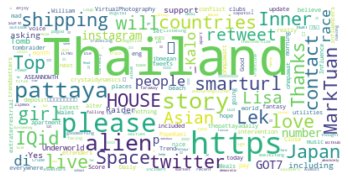

In [ ]:
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Problem 2 Study Collected Tweets about Weather Sentiment

A collection of collected Twitter datasets: https://github.com/shaypal5/awesome-twitter-data
<br>
Most datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```
We are working with a labeled dataset called *Weather Sentiment* where contributors were asked to grade the sentiment of a particular tweet relating to the weather. You can see the source from https://data.world/crowdflower/weather-sentiment.
<br>
We are reading data from the file 'weather-agg-DFE.csv'.

In [ ]:
import pandas as pd
# Specify the corresponding directory in your drive
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DW_BDA_Project1/weather-agg-DFE.csv')
print(df.shape) # (#rows, #columns)
print(df.columns)
print(df.head())

(1000, 10)
Index(['_unit_id', '_canary', '_unit_state', '_trusted_judgments',
       '_last_judgment_at',
       'what_emotion_does_the_author_express_specifically_about_the_weather',
       'what_emotion_does_the_author_express_specifically_about_the_weather:confidence',
       'gold_answer', 'tweet_id', 'tweet_text'],
      dtype='object')
    _unit_id  _canary _unit_state  _trusted_judgments _last_judgment_at  \
0  314960380      NaN   finalized                  20      8/24/13 0:21   
1  314960381      NaN   finalized                  20      8/24/13 0:49   
2  314960382      NaN   finalized                  20      8/24/13 0:55   
3  314960383      NaN   finalized                  20      8/24/13 0:48   
4  314960384      NaN   finalized                  20      8/24/13 1:19   

  what_emotion_does_the_author_express_specifically_about_the_weather  \
0                                           Positive                    
1                                           Negative       

Let's analyze tweet texts for each type of the sentiment

In [ ]:
from collections import Counter
Counter(df['what_emotion_does_the_author_express_specifically_about_the_weather'])

Counter({'Positive': 231,
         'Negative': 271,
         'Neutral / author is just sharing information': 261,
         'Tweet not related to weather condition': 235,
         "I can't tell": 2})

We are inspecting tweets labeled as Positive and Negative to understand the relationship between weather and the +/- sentiments

In [ ]:
positive_tweets = df['tweet_text'][df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Positive']
positive_tweets

0      Grilling kabobs on the grill last night was am...
3      Im going to lunch early today.   The weather i...
5      Passing out now.  working tonight. Storms toda...
9      TGif biatches! Here's to a sunny Friday regard...
16                 It is hot out here but it feels great
                             ...                        
978    I wish I had a girlfriend, this is perfect wea...
981    A'right despite feeling flu-ish im gonna go pl...
982      In Rhode Island and it's a beautiful sunny day!
984    @mention nothing better then woman in warm wea...
995    good morning, it's sunny, pick up new car and ...
Name: tweet_text, Length: 231, dtype: object

In [ ]:
negative_tweets = df['tweet_text'][df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Negative']
negative_tweets

1      The slowest day ever !! And the weather makes ...
7      @mention s friday at 6 at tha stadium ...if th...
8      I hate this weather. Good day for a movie mara...
10     @mention good crowd in Wrigley today, terrible...
12     in the house washing clothes on this rainy day...
                             ...                        
991    Guess another severe #Thunderstorm is heading ...
992    I wanna do something fun but I don't want to b...
993    Prayers going out to Joplin, Missouri and ever...
997    RT @mention: Do NOT go out to move your car in...
998    Not outside but looking out the window at them...
Name: tweet_text, Length: 271, dtype: object

In [ ]:
neutral_tweets = df['tweet_text'][df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Neutral / author is just sharing information']
neutral_tweets

2      Fire Weather Watch issued May 17 at 4:21PM CDT...
4      Weekend Weather Causes Delays In I-270 Bridge ...
6      US GAS: Warm-Weather Forecasts Lift Natural Ga...
13     #WEATHER:  2:53 pm : 57.0F. Feels 56F. 30.10% ...
15     ...SHOWERS AND THUNDERSTORMS MOVING SLOWLY OVE...
                             ...                        
980    RT @mention: ...even the weather in OKC is #th...
983    #WEATHER: 8:52 pm C: 76.0F. Feels F. 29.76% Hu...
986                           @mention it's cold outside
988    #WEATHER:  4:53 pm : 89.0F. Feels F. 29.72% Hu...
989    RT @mention: RT @mention: BREAKING: Large, wed...
Name: tweet_text, Length: 261, dtype: object

### Pre-processing Tweets

In [ ]:
#----------------------------------------------
# Your code starts here
# For tweets labeled as positive and negative sentiment, 
# combine tweet texts in each type 
# then tokenize texts




In [ ]:
#เปลี่ยน positive_tweets ให้เป็น str

In [ ]:
type(positive_tweets)

pandas.core.series.Series

In [ ]:
text_positive = " ".join([t for t in positive_tweets]).lower()#.lower()ทำให้เป็นตัวพิมเล็กทั้งหมด
text_positive 

'grilling kabobs on the grill last night was amazing! i\'m so glad this weather is finally  here. im going to lunch early today.   the weather is nice outside so im going to enjoy #metime somewhere pleasant :) passing out now.  working tonight. storms today would be nice. would be great sleeping weather. mmmm tgif biatches! here\'s to a sunny friday regardless of rain and drama! #popularnameregardlessofparticipation it is hot out here but it feels great @mention oh nice! we\'re all the way here in sunny burbank california! hi from sunny boston. weather is fine, wish you were here... (@ joe\'s american bar & grill w/ 2 others) {link} @mention looking forward to your show tonight in salt lake city. the weather is supposed to be great. hopefully you\'ll toss me a pick @mention we can finally compete with your weather in fl! sunny & 70 here in chicago today! .@mention & i just finished an hour jog on the bosque. a little windy, but otherwise a beautiful day. it\'s about time! c\'mon summer

In [ ]:
type(text_positive)

str

In [ ]:
#เปลี่ยน negative_tweets ให้เป็น str

In [ ]:
แ

pandas.core.series.Series

In [ ]:
text_negative = " ".join([t for t in negative_tweets]) .lower()#.lower()ทำให้เป็นตัวพิมเล็กทั้งหมด
text_negative

'the slowest day ever !! and the weather makes it even worse ! @mention s friday at 6 at tha stadium ...if tha weather bad its gone be in tha gym at 3 i hate this weather. good day for a movie marathon though... xmen! :d @mention good crowd in wrigley today, terrible weather. tell that redneck that just called in 2 check the reds crowd on a wed. day game in the house washing clothes on this rainy day #bored freezing cold like always whoo buddy excited for tonight let\'s go #11in11 rt @mention: need that warm weather to come back i want the sunshine back, please come back :) @mention if this is what seattle is like, i\'m not surprised somebody killed rosie larsen. everybody must be surly. #thekilling #rain @mention ditto i should have worn shorts today! hello humidity! it\'s hot  as #truck outside in florida, the hotter it is outside, the colder it is inside. freezing at my desk today. eww its 81% humidity  today :i @mention storm? be safe! the weather has been crazy lately! its super a

In [ ]:
type(text_negative)

str

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
positive = word_tokenize(text_positive) #ทำให้ text เป็น tokenize ของ positive_tweets
print(positive)

['grilling', 'kabobs', 'on', 'the', 'grill', 'last', 'night', 'was', 'amazing', '!', 'i', "'m", 'so', 'glad', 'this', 'weather', 'is', 'finally', 'here', '.', 'im', 'going', 'to', 'lunch', 'early', 'today', '.', 'the', 'weather', 'is', 'nice', 'outside', 'so', 'im', 'going', 'to', 'enjoy', '#', 'metime', 'somewhere', 'pleasant', ':', ')', 'passing', 'out', 'now', '.', 'working', 'tonight', '.', 'storms', 'today', 'would', 'be', 'nice', '.', 'would', 'be', 'great', 'sleeping', 'weather', '.', 'mmmm', 'tgif', 'biatches', '!', 'here', "'s", 'to', 'a', 'sunny', 'friday', 'regardless', 'of', 'rain', 'and', 'drama', '!', '#', 'popularnameregardlessofparticipation', 'it', 'is', 'hot', 'out', 'here', 'but', 'it', 'feels', 'great', '@', 'mention', 'oh', 'nice', '!', 'we', "'re", 'all', 'the', 'way', 'here', 'in', 'sunny', 'burbank', 'california', '!', 'hi', 'from', 'sunny', 'boston', '.', 'weather', 'is', 'fine', ',', 'wish', 'you', 'were', 'here', '...', '(', '@', 'joe', "'s", 'american', 'bar

In [ ]:
negative = word_tokenize(text_negative) #ทำให้ text เป็น tokenize ของ negative_tweets
print(negative)

['the', 'slowest', 'day', 'ever', '!', '!', 'and', 'the', 'weather', 'makes', 'it', 'even', 'worse', '!', '@', 'mention', 's', 'friday', 'at', '6', 'at', 'tha', 'stadium', '...', 'if', 'tha', 'weather', 'bad', 'its', 'gone', 'be', 'in', 'tha', 'gym', 'at', '3', 'i', 'hate', 'this', 'weather', '.', 'good', 'day', 'for', 'a', 'movie', 'marathon', 'though', '...', 'xmen', '!', ':', 'd', '@', 'mention', 'good', 'crowd', 'in', 'wrigley', 'today', ',', 'terrible', 'weather', '.', 'tell', 'that', 'redneck', 'that', 'just', 'called', 'in', '2', 'check', 'the', 'reds', 'crowd', 'on', 'a', 'wed.', 'day', 'game', 'in', 'the', 'house', 'washing', 'clothes', 'on', 'this', 'rainy', 'day', '#', 'bored', 'freezing', 'cold', 'like', 'always', 'whoo', 'buddy', 'excited', 'for', 'tonight', 'let', "'s", 'go', '#', '11in11', 'rt', '@', 'mention', ':', 'need', 'that', 'warm', 'weather', 'to', 'come', 'back', 'i', 'want', 'the', 'sunshine', 'back', ',', 'please', 'come', 'back', ':', ')', '@', 'mention', 'if

#### Clean tweets

In [ ]:
#----------------------------------------------
# Your code starts here
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?





In [ ]:
# ลบ stop words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords.words('english')) #stop words ที่มีในลิสต์อยู่แล้วจะเห็นว่ามันเป็นตัวพิมเล็กทั้งหมดเราเลยต้องแปลงข้อมูล

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
sw_positive = [word for word in positive if word not in stopwords.words('english')] #ลบ stop word ของ positive_tweet
print(sw_positive)

['grilling', 'kabobs', 'grill', 'last', 'night', 'amazing', '!', "'m", 'glad', 'weather', 'finally', '.', 'im', 'going', 'lunch', 'early', 'today', '.', 'weather', 'nice', 'outside', 'im', 'going', 'enjoy', '#', 'metime', 'somewhere', 'pleasant', ':', ')', 'passing', '.', 'working', 'tonight', '.', 'storms', 'today', 'would', 'nice', '.', 'would', 'great', 'sleeping', 'weather', '.', 'mmmm', 'tgif', 'biatches', '!', "'s", 'sunny', 'friday', 'regardless', 'rain', 'drama', '!', '#', 'popularnameregardlessofparticipation', 'hot', 'feels', 'great', '@', 'mention', 'oh', 'nice', '!', "'re", 'way', 'sunny', 'burbank', 'california', '!', 'hi', 'sunny', 'boston', '.', 'weather', 'fine', ',', 'wish', '...', '(', '@', 'joe', "'s", 'american', 'bar', '&', 'grill', 'w/', '2', 'others', ')', '{', 'link', '}', '@', 'mention', 'looking', 'forward', 'show', 'tonight', 'salt', 'lake', 'city', '.', 'weather', 'supposed', 'great', '.', 'hopefully', "'ll", 'toss', 'pick', '@', 'mention', 'finally', 'compe

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
freq = nltk.FreqDist() #ดูความถี่ของคำใน positive_tweet
for key,val in freq.items():
    print(str(key) + ':' + str(val))

In [ ]:
freq_positive = nltk.FreqDist(sw_positive) #ดูความถี่ของคำใน positive_tweet
for key,val in freq.items():
    print(str(key) + ':' + str(val))

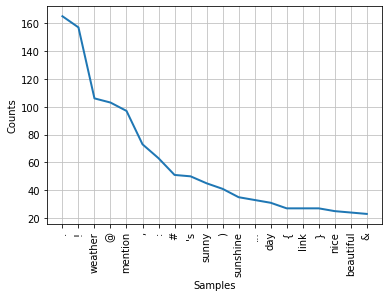

In [ ]:
freq_positive.plot(20, cumulative=False)

In [ ]:
sw_negative = [word for word in negative if word not in stopwords.words('english')] #ลบ stop word ของ negative_tweet
print(sw_negative)

['slowest', 'day', 'ever', '!', '!', 'weather', 'makes', 'even', 'worse', '!', '@', 'mention', 'friday', '6', 'tha', 'stadium', '...', 'tha', 'weather', 'bad', 'gone', 'tha', 'gym', '3', 'hate', 'weather', '.', 'good', 'day', 'movie', 'marathon', 'though', '...', 'xmen', '!', ':', '@', 'mention', 'good', 'crowd', 'wrigley', 'today', ',', 'terrible', 'weather', '.', 'tell', 'redneck', 'called', '2', 'check', 'reds', 'crowd', 'wed.', 'day', 'game', 'house', 'washing', 'clothes', 'rainy', 'day', '#', 'bored', 'freezing', 'cold', 'like', 'always', 'whoo', 'buddy', 'excited', 'tonight', 'let', "'s", 'go', '#', '11in11', 'rt', '@', 'mention', ':', 'need', 'warm', 'weather', 'come', 'back', 'want', 'sunshine', 'back', ',', 'please', 'come', 'back', ':', ')', '@', 'mention', 'seattle', 'like', ',', "'m", 'surprised', 'somebody', 'killed', 'rosie', 'larsen', '.', 'everybody', 'must', 'surly', '.', '#', 'thekilling', '#', 'rain', '@', 'mention', 'ditto', 'worn', 'shorts', 'today', '!', 'hello', 

In [ ]:
freq_negative = nltk.FreqDist(sw_negative) #ดูความถี่ของคำใน negative_tweet
for key,val in freq.items():
    print(str(key) + ':' + str(val))

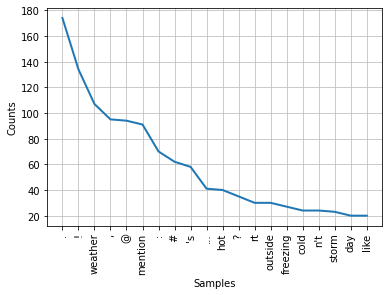

In [ ]:
freq_negative.plot(20, cumulative=False)

In [ ]:
new_stopwords = ['.','!','@','mention','weather', ':',',','#','rt','link','&','?',"'s",'it','I','...','{','}','(',')','..','lol']
new_stopwords #สร้างคำ stop words ขึ้นมาเอง จากการที่เราหาความถี่ของคำ

['.',
 '!',
 '@',
 'mention',
 'weather',
 ':',
 ',',
 '#',
 'rt',
 'link',
 '&',
 '?',
 "'s",
 'it',
 'I',
 '...',
 '{',
 '}',
 '(',
 ')',
 '..',
 'lol']

In [ ]:
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords) #เพิ่ม stop words ที่เราสร้างเองลงใน stop word list

In [ ]:
rcw_positive = [words for words in sw_positive if not words in stpwrd] #ลบ stop words
print(rcw_positive)

['grilling', 'kabobs', 'grill', 'last', 'night', 'amazing', "'m", 'glad', 'finally', 'im', 'going', 'lunch', 'early', 'today', 'nice', 'outside', 'im', 'going', 'enjoy', 'metime', 'somewhere', 'pleasant', 'passing', 'working', 'tonight', 'storms', 'today', 'would', 'nice', 'would', 'great', 'sleeping', 'mmmm', 'tgif', 'biatches', 'sunny', 'friday', 'regardless', 'rain', 'drama', 'popularnameregardlessofparticipation', 'hot', 'feels', 'great', 'oh', 'nice', "'re", 'way', 'sunny', 'burbank', 'california', 'hi', 'sunny', 'boston', 'fine', 'wish', 'joe', 'american', 'bar', 'grill', 'w/', '2', 'others', 'looking', 'forward', 'show', 'tonight', 'salt', 'lake', 'city', 'supposed', 'great', 'hopefully', "'ll", 'toss', 'pick', 'finally', 'compete', 'fl', 'sunny', '70', 'chicago', 'today', 'finished', 'hour', 'jog', 'bosque', 'little', 'windy', 'otherwise', 'beautiful', 'day', 'time', "c'mon", 'summer', 'nothing', 'says', '``', 'happy', 'cinco', 'de', 'mayo', "''", 'like', 'ap', 'test', 'rainy',

In [ ]:
rcw_negative = [words for words in sw_negative if not words in stpwrd] #ลบ stop words
print(rcw_negative)

['slowest', 'day', 'ever', 'makes', 'even', 'worse', 'friday', '6', 'tha', 'stadium', 'tha', 'bad', 'gone', 'tha', 'gym', '3', 'hate', 'good', 'day', 'movie', 'marathon', 'though', 'xmen', 'good', 'crowd', 'wrigley', 'today', 'terrible', 'tell', 'redneck', 'called', '2', 'check', 'reds', 'crowd', 'wed.', 'day', 'game', 'house', 'washing', 'clothes', 'rainy', 'day', 'bored', 'freezing', 'cold', 'like', 'always', 'whoo', 'buddy', 'excited', 'tonight', 'let', 'go', '11in11', 'need', 'warm', 'come', 'back', 'want', 'sunshine', 'back', 'please', 'come', 'back', 'seattle', 'like', "'m", 'surprised', 'somebody', 'killed', 'rosie', 'larsen', 'everybody', 'must', 'surly', 'thekilling', 'rain', 'ditto', 'worn', 'shorts', 'today', 'hello', 'humidity', 'hot', 'truck', 'outside', 'florida', 'hotter', 'outside', 'colder', 'inside', 'freezing', 'desk', 'today', 'eww', '81', '%', 'humidity', 'today', 'storm', 'safe', 'crazy', 'lately', 'super', 'awful', 'ok', 'soo', 'moody', 'fuckin', 'hot', 'today', 

In [ ]:
#----------------------------------------------
# Your code starts here
# analyze word frequency in each sentiment type






In [ ]:
# Count word frequency
freq_p = nltk.FreqDist(rcw_positive)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

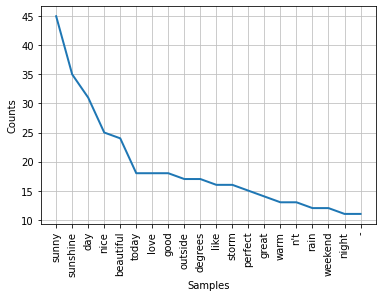

In [ ]:
freq_p.plot(20, cumulative=False)

In [ ]:
# Count word frequency
freq_n = nltk.FreqDist(rcw_negative)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

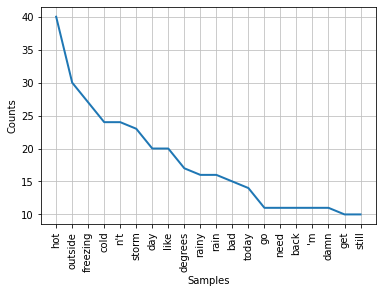

In [ ]:
freq_n.plot(20, cumulative=False)

In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation






In [ ]:
#สร้าง word cloud ในการดูว่าพบคำไหนเยอะสุด ในของแต่ละอัน

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
wc_p = " ".join(t for t in rcw_positive)
wc_p

"grilling kabobs grill last night amazing 'm glad finally im going lunch early today nice outside im going enjoy metime somewhere pleasant passing working tonight storms today would nice would great sleeping mmmm tgif biatches sunny friday regardless rain drama popularnameregardlessofparticipation hot feels great oh nice 're way sunny burbank california hi sunny boston fine wish joe american bar grill w/ 2 others looking forward show tonight salt lake city supposed great hopefully 'll toss pick finally compete fl sunny 70 chicago today finished hour jog bosque little windy otherwise beautiful day time c'mon summer nothing says `` happy cinco de mayo '' like ap test rainy day fail catch fish folks tomorrow weds downtown farmers ' market 4-7. great - copper river sockeye salmon great kind makes want go swimming mmmmmm warm sunny afternoon patio tavern tech center nice day la sunny delicious waiting 70 degrees oh 8 months joke 've real `` dirty girl '' honestly sounds like florida never t

In [ ]:
type(wc_p)

str

In [ ]:
word_cloud_p = WordCloud(collocations = False, background_color = 'white').generate(wc_p)

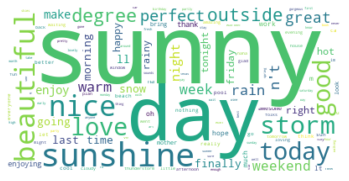

In [ ]:
plt.imshow(word_cloud_p, interpolation='bilinear') #word cloud ของ positive_tweet
plt.axis("off")
plt.show()

In [ ]:
wc_n = " ".join(t for t in rcw_negative)
wc_n

"slowest day ever makes even worse friday 6 tha stadium tha bad gone tha gym 3 hate good day movie marathon though xmen good crowd wrigley today terrible tell redneck called 2 check reds crowd wed. day game house washing clothes rainy day bored freezing cold like always whoo buddy excited tonight let go 11in11 need warm come back want sunshine back please come back seattle like 'm surprised somebody killed rosie larsen everybody must surly thekilling rain ditto worn shorts today hello humidity hot truck outside florida hotter outside colder inside freezing desk today eww 81 % humidity today storm safe crazy lately super awful ok soo moody fuckin hot today cubs- giants game postponed due forecast inclement poor conditions throughout day 66 fucking degrees muthafucker hot time get half naked hint windy nowhere super fun yet cold got ready lay wit someone else girlfriend dontjudgeme hi monali nice meet 'm super jealous profile picture sure beats rainy dc rainy weber thinking cloudy super 

In [ ]:
type(wc_n)

str

In [ ]:
word_cloud_n = WordCloud(collocations = False, background_color = 'white').generate(wc_n)

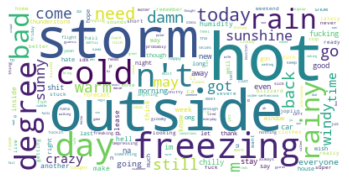

In [ ]:
plt.imshow(word_cloud_n, interpolation='bilinear')  #word cloud ขอ' negative_tweet
plt.axis("off")
plt.show()

# Report 


#How did you analyze the data?   

- การเตรียมข้อมูล ทำการเปลี่ยน negative_tweet และ positive_tweet จากpandas.core.series.Series ให้เป็น string 
- จากนั้นทำ Tokenize เพื่อนำไปทำการ Clean ข้อมูล
- Clean Tweets ได้ทำการลบ stop word ของ negative_tweet และ positive_tweet ใน ลิสต์ stopwords.words('english')
- ทำการหา Count word frequency เพื่อหาคำที่ซ้ำเยอะ คำซ้ำที่พบเยอะสุด     คือ mention wearthe และสัญลักษณ์ต่าง เช่น @, . ,!  
- ทำ stop word ขึ้นมาเองจากการ Count word frequency และลบ stop words จากที่สร้าขึ้นมา
- ทำการหา Count word frequency ที่ได้จากการลบแล้วเพื่อหาคำที่พบบ่อยที่มากสุดใน negative_tweet และ positive_tweet 
- จากนั้นนำมาสร้าง word cloud พบว่าคำที่พบบ่อยใน positive_tweet คือ sunny และ negative_tweet คือ hot


# What did you find in the data? (please include figures or tables in the report, but no source code)

- ได้ data ออกเป็นรูปภาพจากการแสดงผลของ word cloud ดังนี้

-positive_tweet

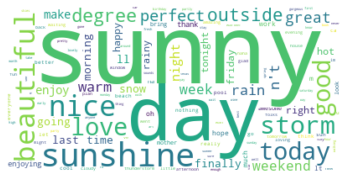


-negative_tweet

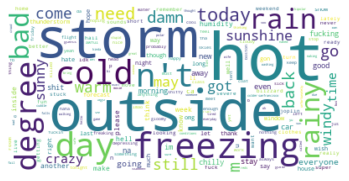
